<a href="https://colab.research.google.com/github/JunSeokCheon/kaggle_house-prices_data_analysis/blob/master/house_price_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kaggle : House Prices - Data cleaning, viz and modeling 
- 아이오와 주 에임스에 있는 주거용 주택의 모든 측면을 설명하는 79 개의 변수로 주택의 판매가격을 예측하는 Competition입니다. 
- 평가 기준 : Submissions are evaluated on Root-Mean-Squared-Error (RMSE) 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/kaggle_study/house_prices

/content/drive/MyDrive/kaggle_study/house_prices


## Part 0. imports, settings, data load

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from datetime import datetime


# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

## Part 1. Exploratory Data Analysis(EDA)
1. 데이터에 얼마나 많은 행과 열이 존재하는지 확인하기(데이터 확인 작업)
2. 특징들의 이름은 무엇이고, 의미하는 바가 무엇인지 확인하기
3. 특징(변수)들의 유형이 무엇인지?(numberical, categorical ... )
4. target 피쳐에 대한 탐구
4. 결측값의 수치와 어떻게 처리할 건지
5. 이상치 탐색과 어떻게 처리할 건지
6. 비대칭도(Skewness) 확인
7. visualization(matplotlib, seaborn)
8. 모든 feature들과 target(SalePrice)와의 상관관계 알아보기(현재 feature가 많은 관계로 모든 feature를 써야할까 ? 생각해보기 안쓴다면 어떤 기준으로 나눠야 할까 생각하고 적용해보기) -> heatmap 으로 표시
9. features 중에서 numberical(Correlation Heat Map, Zoomed Heat Map, Pair Plot, Scatter Plot 사용해봐도 좋음 )/categorical(변수 값과 관련하여 target과의 분포확인, Box Plot) 데이터 탐색하기
10. 파생 변수 생성해보기
11. box-cox 변환해보기

In [ ]:
pd.options.display.max_columns = None
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## - features meaning(간단하게 파악하고 feature drop 작업 시 의미 파악 한번 더 하기)
MSSubClass : 매매와 관련된 주거 타입 식별  
MSZoning : 매매의 일반적인 지역 분류  
LotFrontage : 부동산과 연결된 도로의 선형 피트  
LotArea : 평방피트 단위의 부지 크기  
Street : 부동산으로의 도로(street) 접근 유형  
Alley : 부동산으로의 골목(alley) 접근 유형  
LotShape : 부동산의 일반적인 모양  
LandContour : 부동산의 평탄도  
Utilities : 사용 가능한 유틸리티(수도전기가스) 유형  
LotConfig : 지역 구성  
LandSlope : 부동산의 경사  
Neighborhood : 에임스 시 경계 내의 물리적인 위치  
Condition1 : 주요 도로 및 철도와의 근접성  
Condition2 : 주요 도로 및 철도와의 근접성 (두 개 이상 존재하는 경우)  
BldgType : 주거 유형  
HouseStyle : 주거 스타일  
OverallQual : 전체적인 재료 및 마감 등급  
OverallCond : 집의 전체적인 상태 등급  
YearBuilt : 원래 공사일  
YearRemodAdd : 리모델링 날짜 (리모델링 혹은 추가가 없었던 경우 공사일과 동일)  
RoofStyle : 지붕 유형  
RoofMatl : 지붕 재료  
Exterior 1st : 주택 외장재  
Exterior 2nd : 주택 외장재 (두 개 이상 존재하는 경우)  
MasVnrType : 벽돌 베니어 유형  
MasVnrArea : 벽돌 베니어 면적 (평방피트)  
ExterQual : 외장재 품질  
ExterCond : 외장재 현재 상태  
Foundation : 토대 유형  
BsmtQual : 지하의 높이 평가  
BsmtCond : 지하실 일반적인 상태 평가  
BsmtExposure : 워크아웃 혹은 정원 수준의 벽  
BsmtFinType1 : 지하 마감면의 품질  
BsmtSF1 : 유형 1 마감 평방피트  
BsmtFinType2 : 지하 마감면의 품질 (있는 경우)  
BsmtSF2 : 유형 2 마감 평방피트  
BsmtUnfSF : 마감되지 않은 지하실 면적  
TotalBsmtSF : 지하 총 평방피트  
Heating : 난방 유형  
HeatingQC : 난방 품질 및 상태  
CentralAir : 중앙 에어컨 여부  
Electrial : 전기 시스템  
1stFlrSF : 1층 평방피트  
2ndFlrSF : 2층 평방피트  
LowQualFinSF : 저품질 마감 평방 피트 (모든 층)  
GrLivArea : 지상 거실 면적 평방 피트  
BsmtFullBath : 지하 전체 욕실  
BsmtHalfBath : 지하 반 욕실  
FullBath : 지하층 위의 전체 욕실  
HalfBath : 지하층 위의 반 욕실  
Bedroom : 지하층 위의 침실 수 (지하 침실은 포함하지 않음)  
Kitchen : 지하층 위의 주방 수  
KitchenQual : 주방 품질  
TotRmsAbvGra : 지하층 위의 모든 방 (욕실 제외)  
Functional : 집 기능 (공제가 보장되지 않는 한 일반적인 경우 가정)  
FirePlace : 벽난로 수  
FireplaceQu : 벽난로 품질  
GarageType : 차고 위치  
GarageYrBlt : 차고 건설 연도  
GarageFinish : 차고 내부 마감  
GarageCars : 차량 수용 가능 차고 크기  
GarageArea : 차고 평방피트  
GarageQual : 차고 품질  
GarageCond : 차고 상태  
PavedDrive : 포장된 진입로  
WoodDeckSF : 평방피트 단위의 목재 데크 면적  
OpenPochSF : 평방피트 단위의 개방 현관 면적  
EnclosedPorch : 평방피트 단위의 닫힌 현관 면적  
3SnPorch : 평방 피트의 세 계절 현관 면적  
ScreenPorch : 평방피트 단위의 스크린 현관 면적  
PoolArea : 평방피트 단위의 수영장 면적  
PoolQC : 수영장 품질  
Fence : 울타리 품질  
MiscFeature : 다른 항목에서 다루지 않는 기타 특징  
MiscVal : 기타 특징의 가치  
MoSold : 월 판매  
YrSold : 연 판매  
SaleType : 판매 유형  
SaleCondition : 판매 상태  

In [ ]:
# 중복된 데이터는 없음
df_train.duplicated().sum()

0

In [ ]:
# 수치형 피쳐들에 대한 값에 분포 표시 - nan 값 무시
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 변수 탐색

In [ ]:
print("train 데이터 수와 피처 수 : ", df_train.shape)
print("test 데이터 수와 피처 수 : ", df_test.shape)

train 데이터 수와 피처 수 :  (1460, 81)
test 데이터 수와 피처 수 :  (1459, 80)


- train과 test가 (1460, 81), (1459, 80)으로 생각보다 데이터가 많지 않았고, test에는 target인 SalePrice는 없는것을 확인할 수 있습니다.
- train과 test의 사이즈가 비슷하고 피처수가 많은 것을 보니 적절한 Cross validation과 Feature Selection이 중요할 것으로 보입니다.

In [ ]:
# 수치형 피쳐와 카테고리형 피쳐가 얼마나 있고, 편의상 사용을 위하여 변수에 저장한다.
numerical_features = df_train.dtypes[df_train.dtypes != "object"]
print(f"수치형 변수 개수: {len(numerical_features.index)}개,\n수치형 변수: {numerical_features.index}")
print("--" * 50)
categorical_features = df_train.dtypes[df_train.dtypes == "object"]
print(f"범주형 변수 개수: {len(categorical_features.index)}개,\n범주형 변수: {categorical_features.index}")

수치형 변수 개수: 38개,
수치형 변수: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
----------------------------------------------------------------------------------------------------
범주형 변수 개수: 43개,
범주형 변수: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'Ma

- 피처의 형태가 범주형(Object)이 수치형(int, float)보다 많을것을 볼 수 있습니다. 범주형을 수치형으로 나타내기 위한 Encoding 작업이 중요한 작업이라는 것을 판단할 수 있습니다.

- 범주형 변수에 대해서 좀 더 세부적으로 알아보겠습니다.
1. 변수가 뜻하는 의미가 무엇인지
2. 변수의 값은 무엇인지

- 아래 범주형 데이터를 정리한 hwp 파일입니다.  
https://drive.google.com/file/d/1RziGvMbvcf1FyjvEB_ofSZjkTSOBXbh-/view?usp=sharing

In [ ]:
numerical_features = [    
    'Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
    'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
    'PoolArea','MiscVal', 'MoSold', 'YrSold', 'SalePrice'
]

nominal_features = [
    'MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'SaleType', 
    'SaleCondition','GarageType', 'Alley', 'Fence', 'MiscFeature', 'Electrical' , 'Functional'
]

ordinal_features = [
    'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 
    'ExterCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'PavedDrive', 
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC'
]

categorical_feautres = [
    'MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'SaleType', 
    'SaleCondition','GarageType', 'Alley', 'Fence', 'MiscFeature', 'Electrical' , 'Functional',
    'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 
    'ExterCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'PavedDrive', 
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC'   
]

In [ ]:
print("nominal_features : ", len(nominal_features))
print("ordinal_features : ", len(ordinal_features))
print("numerical_features : ", len(numerical_features))
print("전체 변수 : ", (len(nominal_features)+len(ordinal_features)+len(numerical_features)))

nominal_features :  25
ordinal_features :  21
numerical_features :  35
전체 변수 :  81


- 위 과정을 통해서 알 수 있었던 점이 있습니다.
1. 변수의 NA가 None을 의미하는 변수들이 존재한다. (예를 들면, 주차장을 보유하고 있지 않다는 의미를 NA로 표시되고 있음)
2. 수치형 변수에 범주형 데이터를 의미하는 변수들이 섞여있었고, 범주형 데이터 중 Nominal, Ordinal 데이터셋으로 구분할 수 있습니다.

- 이를 통해 수치형 변수에 범주형 데이터를 의미하는 변수들과, Nominal/Ordinal 데이터셋에 따른 적절한 전처리를 해줘야합니다.
- 또, None을 의미하는 결측치와 그렇지 않은 결측치를 구분하여 맞는 값을 채우는 것을 고려해야 합니다.

### 타켓 변수 : SalePrice 분포 확인(왜도(shewness), 첨도(kurtosis) 확인)

왜도 - 분포가 정규분포에 비해서 얼마나 비대칭인지 나타내는 척도(절대값3미만 정도의 치우침은 왜도가 크지 않다고 판단)  
첨도 - 샘플의 점수가 평균을 중심으로 가까이 몰려 있을수록 분포의 정점은 더욱 뾰족한 모양 첨도가 커진다.(절대값 7미만)  
관련 자료 : https://m.blog.naver.com/yk60park/222100758577

Skewness : 1.882876
Kurtosis : 6.536282


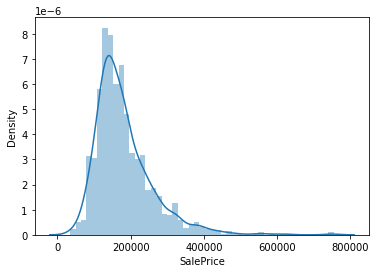

In [ ]:
sns.distplot(df_train['SalePrice'])

print("Skewness : %f" % df_train['SalePrice'].skew())
print("Kurtosis : %f" % df_train['SalePrice'].kurt())

SalePrice 타켓 변수는 데이터가 골고루 분포되지 않은 것을 볼 수 있습니다.(정규성을 띄고 있지 않다)  
ML regression 성능을 악화시킬 영향이 있기 때문에 정규분포 형태로 만들어줍니다.  
log tansformation 사용  
관련 자료 : https://leebaro.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%8B%9C-%EC%8B%9D%EC%97%90-%EB%A1%9C%EA%B7%B8%EB%A5%BC-%EC%B7%A8%ED%95%98%EB%8A%94-%EC%9D%B4%EC%9C%A0  
(log 변환이 성능에 큰 영향을 끼칠까? : 읽어볼만 한 논문 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/) -> 어렵다면 summary만 읽어봐도 좋다!  
(통계 용어로 멱변환이라기도 하고 박스칵스 변환을 알아보자)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

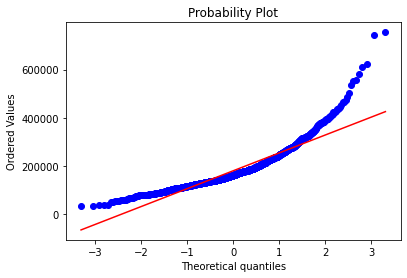

In [ ]:
stats.probplot(df_train['SalePrice'], plot=plt)

Skewness : 0.121347
Kurtosis : 0.809519


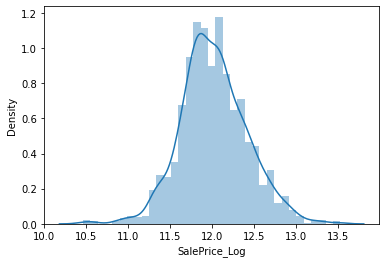

In [ ]:
df_train['SalePrice_Log'] = np.log1p(df_train['SalePrice'])

sns.distplot(df_train['SalePrice_Log'])

print("Skewness : %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis : %f" % df_train['SalePrice_Log'].kurt())

# df_train.drop('SalePrice', axis= 1, inplace=True)

log 변환을 위해서 np.log1p를 사용하는 것을 볼 수 있는데, np.log와 np.log1p의 차이점을 알아야 합니다.  
관련 자료 : https://suppppppp.github.io/posts/Why-Series-MDM-1/

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.398259646654151, 12.024057394918403, 0.9953761551826702))

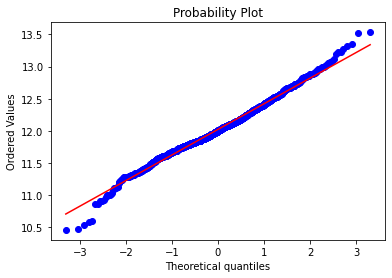

In [ ]:
stats.probplot(df_train['SalePrice_Log'], plot=plt)

하위 5개와 상위 2개의 데이터를 제외하고 데이터가 정규성을 잘 따르고 있는 것을 볼 수 있습니다.

In [ ]:
for col in numerical_features:
  print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df_train[col].skew()) ,
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.20
LotFrontage     Skewness: 02.16     Kurtosis: 017.45
LotArea         Skewness: 12.21     Kurtosis: 203.24
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.67     Kurtosis: 010.08
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 016.40
FullBath        Skewness: 00.04     Kurtosis: -00.86
HalfBath        Skewness: 00.68     Kurtosis: -01.08
BedroomAbvGr    Skewness: 00.21     Kurtosis: 

SalePrice는 log transformation으로 정규 분포형태로 안정화를 시켰지만, 위 결과를 보면 다른 피처들 중에 많이 왜곡되어 있는 피처들이 존재한다. (ex, LotArea, MiscVal, MoSold ... )  
이후에 결측값/이상치 제거하고 수치형 변수들에 대한 상관관계와 데이터 plot을 확인한 후 판단하여 여전히 왜곡된 피처들이라면 각각의 피처들에 대하여 log transformation 실행하자

범주형 데이터에 대한 처리는 ? -> 의미 파악 하기 힘들다 -> 그러면 어떻게 ? -> 더미 변수, one-hot encoding, label encoder, embedding 등등  
관련 자료 : https://datascienceschool.net/03%20machine%20learning/02.02%20%EB%B2%94%EC%A3%BC%ED%98%95%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%B2%98%EB%A6%AC.html



### 수치형 변수 - 시각화
- 전체 수치형 변수에 대한 시각화를 진행하겠습니다.
- SalePrice와 관련있는 변수들을 살펴보겠습니다.

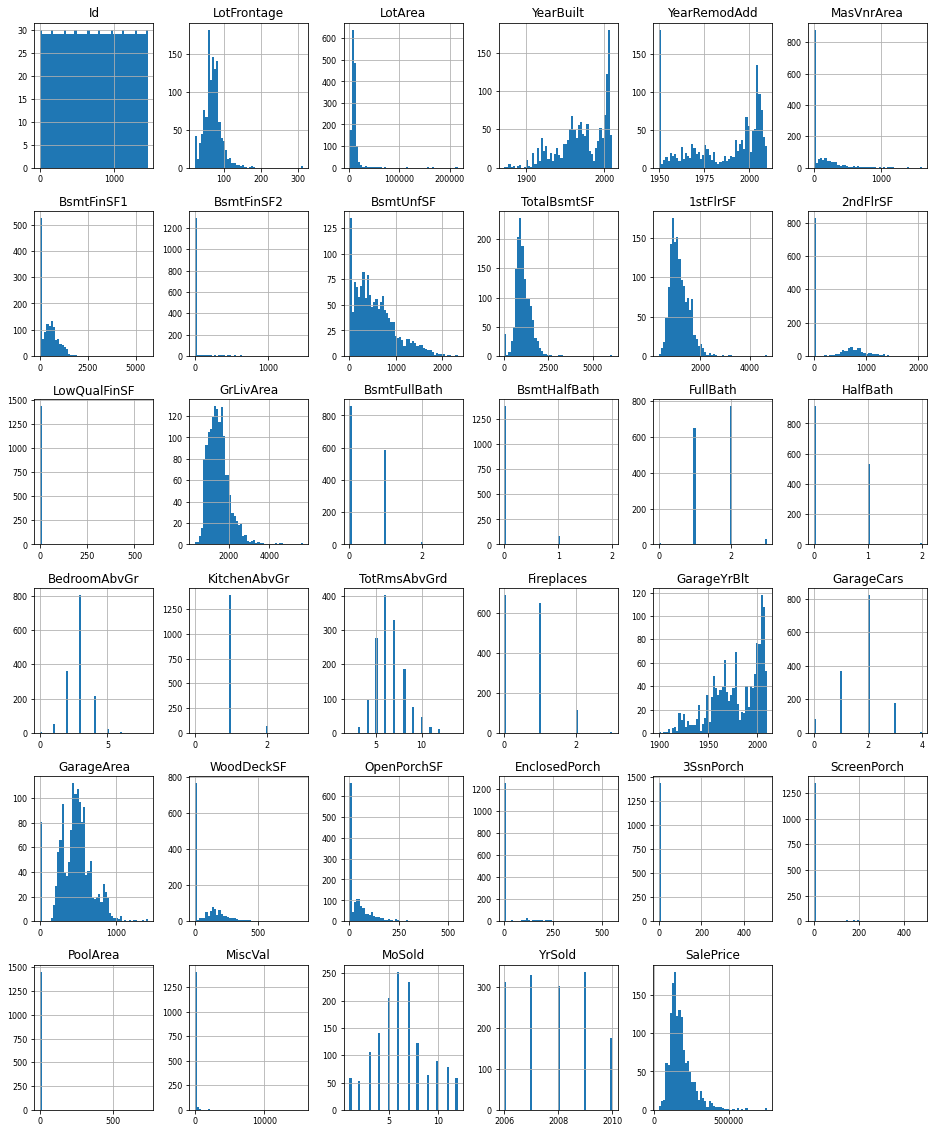

In [ ]:
df_train[numerical_features].hist(figsize=(16,20), bins = 50, xlabelsize=8, ylabelsize=8)
plt.show()

위 결과를 보고 도출해낼 수 있는 insight
1. Target 변수인 SalePrice와 유사한 분포를 가진 피처들이 존재한다 -> 그 의미는 ? -> 서로 상관관계가 높은 것이 아닐까 유추할 수 있다.(확신 x, 후에 correlation heatmap에서 확인하자)
2. ~~value가 0인 피처들이 많다 -> 결과를 도출해내는데 필요가 없는 피처들이 아닐까?~~

수치형 변수들과 target인 SalePrice와의 상관계수를 알아보겠습니다.

In [ ]:
corr = df_train.corr()['SalePrice']
corr_abs = corr.abs()
corr_abs = corr_abs.drop("SalePrice_Log")

numerical_corr = corr_abs.sort_values(ascending=False)
numerical_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [ ]:
high_corr_features = corr_abs.index[corr_abs.values >= 0.5]

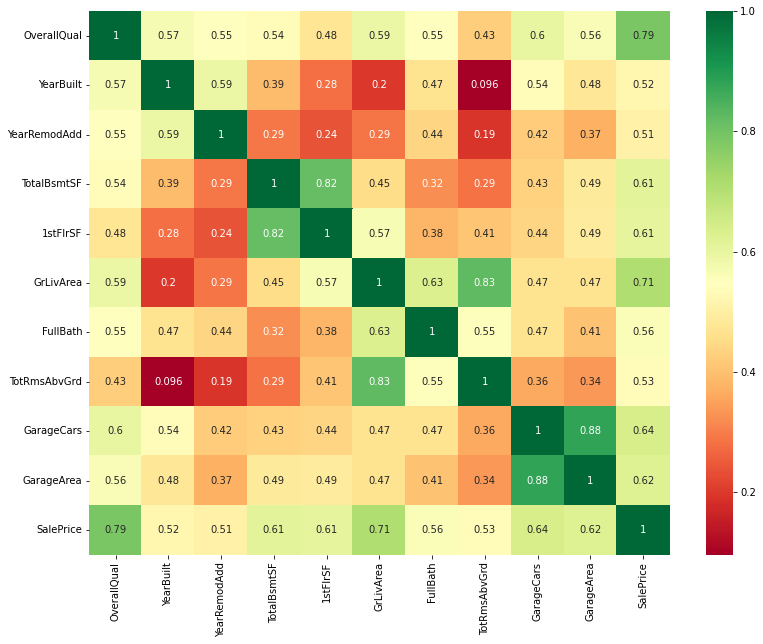

In [ ]:
plt.figure(figsize=(13,10))
corr_heatmap = sns.heatmap(df_train[high_corr_features].corr(), annot=True,cmap="RdYlGn")

target과의 상관계수가 0.5 이상인 피처들을 뽑아서 heatmap으로 작성했습니다. 
위 hist plot에서 도출된 내용인 SalePrice와 비슷한 정규분포를 가진 피처들이 있는 것을 확인할 수 있습니다.  
수치형 변수는 해당 피처들로 모델링을 진행하면 좋은 성능을 발휘할 것으로 보입니다.  
  
**특이 사항**  
상관계수 Histogram을 살펴보면서 새로운 사실을 알 수 있었는데, 위 상관계수를 보면 GarageCars와 GarageArea인 차량 수용 가능 차고 크기와 차고 평방 피트를 주목해봅시다.  
상식적으로 차량 수용 가능 차고 크기가 크면 차고 평방 피트가 크다. GarageCars와 GarageArea는 이 특징을 둘 다 가지고 있습니다.  
상관계수를 보면 0.88로 아주 높은 상관계수를 가지고 있습니다. 이것이 과연 좋은 값일까요? (YearBuilt, GarageYrbit ...)  
<다중 공선성>에 따르면 독립변수 즉, target이 아닌 특징들에 대하여 서로 독립적인 관계여야 한다고 합니다.
하지만 위 특징은 서로 독립적인 관계가 아니고 거의 하나로 움직이는데 주로 상관계수가 0.7이상일 때 다중 공선성이 나타난다고 합니다.  
그러면 어떻게 해야할까요?  
~~필자는 다중 공선성을 제거하기 위해 target과의 상관계수가 낮은 특징들을 제거하는 방법을 사용하면 된다고 생각한다.~~
~~그래도 피처들을 지우는 행위는 위험할 수도 있으니 잘 생각해보고 실행하자~~  
다중공선성을 보이는 변수들에 대한 처리를 자문을 구한 결과 크게 4가지로 나눠진다고 합니다.(주관적)  
1. 둘 중 타겟과의 상관계수가 낮은 변수 삭제
2. 다중공선성 변수들을 하나로 묶어서 파생변수 처리
3. 더미기법 사용(범주형 데이터에 흔히 사용)
4. ~~다중공선성이 강하게 나타나는 변수중에 해당 독립변수가 영향을 매우 끼치는 변수면 그냥 두기~~

필자는 2/4번 방법을 사용할 예정입니다.
현재 상태
1. 1stFlrSF(0.61)-1층 평방피트 / TotalBsmtSF(0.61)-지하 총 평방피트  --------------> 0.82

2. GrLivArea(0.71)-지상 거실 면적 평방 피트 / TotRmsAbvGra(0.53)-지하층 위의 모든 방 (욕실 제외) -- 0.83

3. GarageYrBit(0.49)-차고 지어진 연도 / YearBuilt(0.52)-건물 지어진 연도 ------> 0.83

4. GarageCars(0.64)-차량 수용 가능 차고 크기 / GarageArea(0.62)-차고 평방피트 ---->  0.88

~~1, 3은 두 변수의 합쳐서 새로운 변수를 만들고, 2와 4는 모든 변수가 유의미하다고 판단하여 그냥 두겠습니다.~~  
1, 3은 두 변수의 합쳐서 새로운 파생변수를 만들고, 2와 4는 target과의 상관계수가 낮은 변수들을 삭제하겠습니다.
  
관련 자료 : 다중공선성 - https://learnx.tistory.com/entry/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1Multicollinearity%EC%9D%B4%EB%9E%80

### 상관계수가 높은 그래프를 그려서 분석과 이상치 탐색에 대한 인사이트를 얻습니다. (0.5 이상) 
OverallQual      
GrLivArea      
GarageCars      
GarageArea       
TotalBsmtSF      
1stFlrSF    
FullBath  
TotRmsAbvGrd  
YearBuilt  
YearRemodAdd  

##### OverallQual

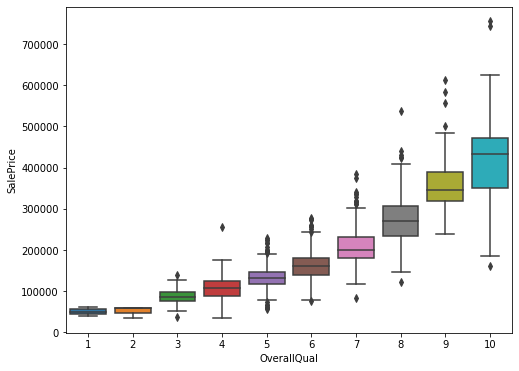

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.show()

OverallQual은 집의 전체적인 재료 및 마감 등급을 나타내며, 집의 전반적인 가치를 의미하는 변수입니다.  
가치가 높아지면 집의 가격이 높아지는 것은 당연하므로 0.79로 높은 상관관계를 보입니다.  
그런데, boxplot에서 너무 낮거나 높은 이상치들이 존재하므로 확인이 필요합니다.

##### GrLivArea

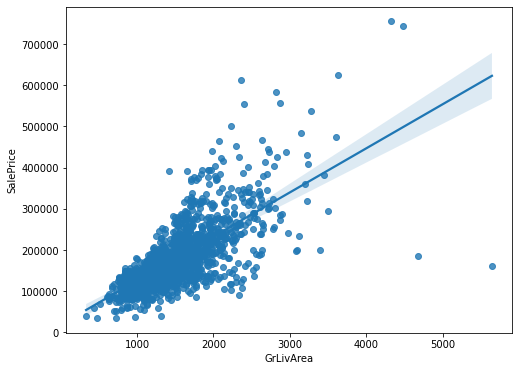

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

GrLivArea는 거실의 크기가 얼마나 되는지 의미하는 변수입니다.  
거실이 크면 클수록 집의 가격이 올라가는 걸 확인할 수 있습니다. 
그런데, 오른쪽 하단 2개의 데이터는 거실의 크기가 큼에도 불구하고 가격이 낮은 것을 보면 확인이 필요합니다.

##### GarageCars

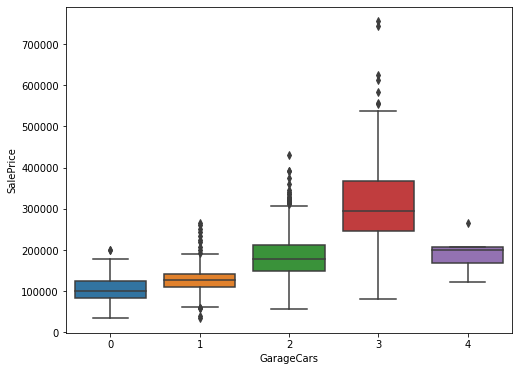

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['GarageCars']], axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='GarageCars', y='SalePrice', data=data)

GarageCars은 4의 값이 눈에띄게 이상한 것을 볼 수 있습니다.  
주차장의 수용 차량의 개수가 많으면 집의 가격이 높아지다가 4에서 낮아졌습니다.
어떤 특별한 이유가 있을꺼 같습니다. (시골이라서 집값은 싸지만 차량 수용하는 범위는 넓다던가 등..)

##### GarageArea

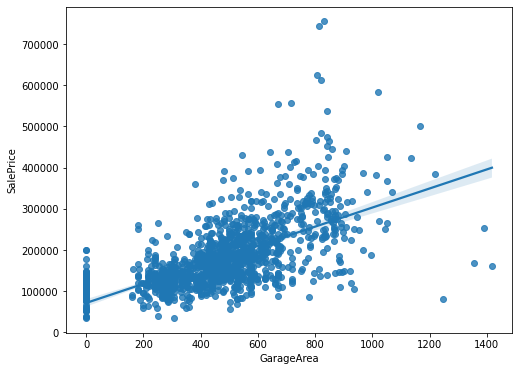

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['GarageArea']], axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='GarageArea', y='SalePrice', data=data)

GarageArea는 GarageCars와 유사한 형태로 나타납니다.  
GarageArea가 매우 큼에도 집 값이 낮은 경우가 있고(시골?), GarageArea가 중간임에도 불구하고 집값이 매우 높은 경우(확실한 이상치라고 판단)가 있습니다.

##### TotalBsmtSF

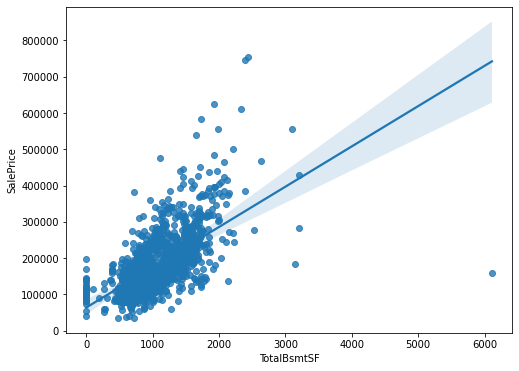

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='TotalBsmtSF', y='SalePrice', data=data)
plt.show()

TotalBsmtSF은 지하실 구역의 square feet를 표시한 값입니다. 선형성을 띄고 있지만, 몇몇 이상치 값이 보입니다.  
재밌는 점은 TotalBsmtSF이 0인 데이터 즉, 지하실이 없는 데이터가 존재하는 것입니다.

##### 1stFlrSF         

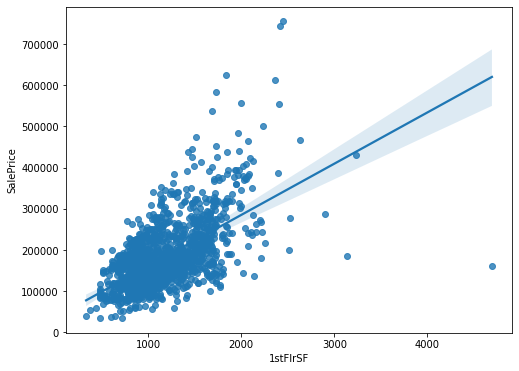

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['1stFlrSF']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='1stFlrSF', y='SalePrice', data=data)

1stFlrSF는 1층의 square feet를 표시한 값입니다.  
TotalBsmtSF와 매우 유사한 양상을 보입니다.  
신기하게도 GarageArea에서 볼수 있었던 크기는 넓으나 SalePrice가 낮은 현상을 볼 수 있습니다. 


##### FullBath

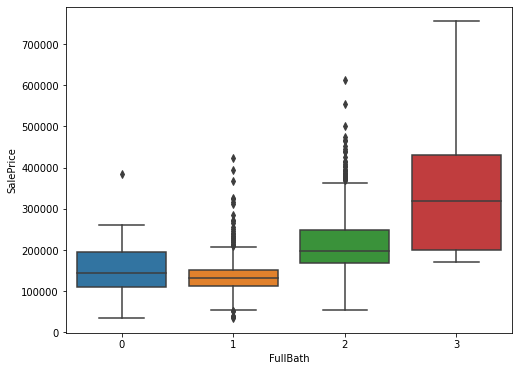

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='FullBath', y='SalePrice', data=data)

FullBath는 완전한 욕실의 갯수를 의미합니다. 여기서 완전한 욕실이라고 한 이유는 HalfBath같은 반쪽 욕실도 존재하기 때문입니다.  
그래서 FullBath가 0이라도 데이터의 수가 어느정도 있는 이유는 다은 유형의 Bath들이 있어서 다른 값보다 크게 나온거 같습니다.

##### TotRmsAbvGrd

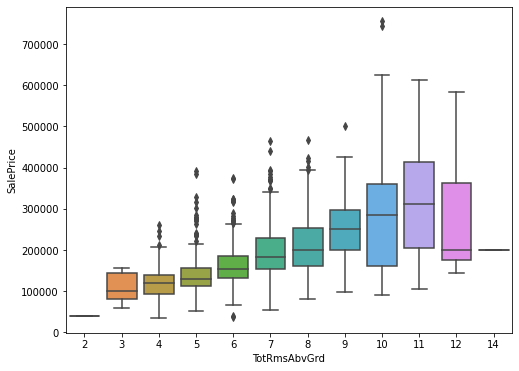

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['TotRmsAbvGrd']], axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=data)

TotRmsAbvGrd은 Bathroom을 제외한 모든 방의 개수입니다.  
11개까지는 점진적으로 SalePrice가격이 증가하나 12개 부터는 조금 하락하는 것을 볼 수 있습니다.
그리고 10개에서 이상치를 찾을 수 있습니다.  
특이한 점은 방의 개수가 14개 일때 SalePrice가 낮은걸 볼 수 있는데, 이것을 시골이라는 위치로 생각해야 할지, 이상치로 생각할 지 확인해볼 필요가 있습니다.(해당 row 출력)

##### YearBuilt

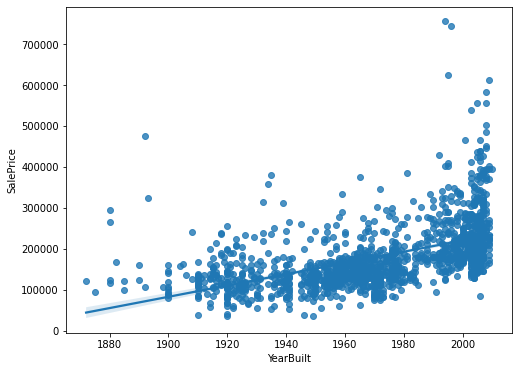

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='YearBuilt', y='SalePrice', data=data)

YearBuilt는 지어진 년도에 따른 SalePrice 가격입니다.  
대체로 선형을 보이지만 2000년대 이후로 지어진 집들은 가격의 편차가 크고, 1900년 이전에는 이상치가 보입니다.  
Remodel같은 변수들이 있는 것으로 보아 1900년 이전에 집들은 리모델링 되어서 비싸졌을까 추측할 수 있습니다.

##### YearRemodAdd

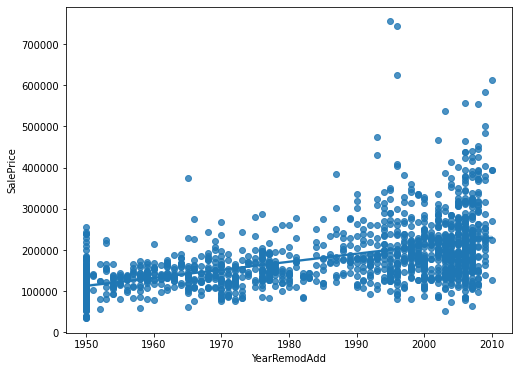

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['YearRemodAdd']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='YearRemodAdd', y='SalePrice', data=data)

YearRemodAdd은 해당 집이 리모델링 된 연도를 의미합니다.  
2000년도에 리모델링이 많이 되었는 것 확인해볼 수 있고, SalePrice도 비싸진 걸 확인할 수 있습니다. (50년도 이하 데이터를 제외하고 그래프 출력해보기)

### 범주형 변수 - 시각화

일자형 데이터의 특징들이 많다면 연관이 없다고 볼 수 있겠습니다.  
일자형 데이터를 볼 때도 데이터가 1개인지 똑같은 데이터가 여러개인지 파악도 해야합니다.  
그리고, 각 변수의 특징들과 Saleprice와의 그래프 분포가 논리적으로 일치하는지 확인해야 합니다. (좋은 평가의 집 일수록 집 가격이 높다)  
유형이 같은 애들을 수치형/범주형 차이 두지말고 그룹핑해서 그래프를 보면 새로운 인사이트를 얻을 수 있습니다.  
boxplot에서 default인 평균값이 아닌 최소값/최대값으로 그래프를 그려보면 새로운 인사이트를 얻을 수 있습니다.  

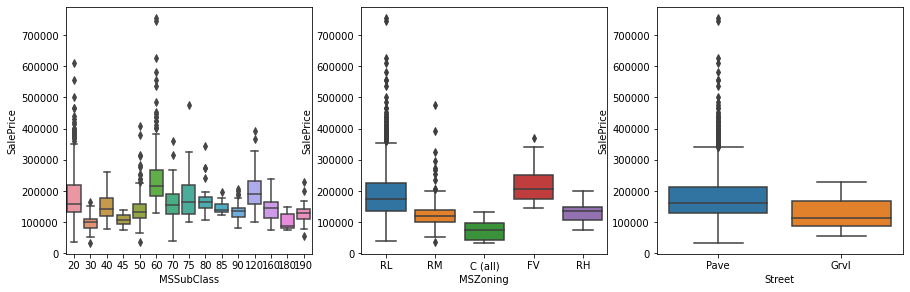

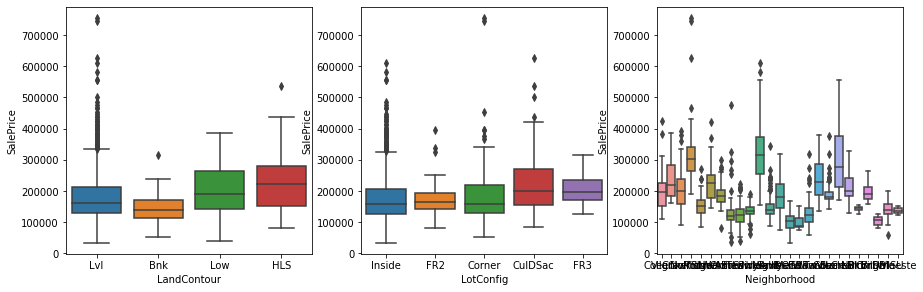

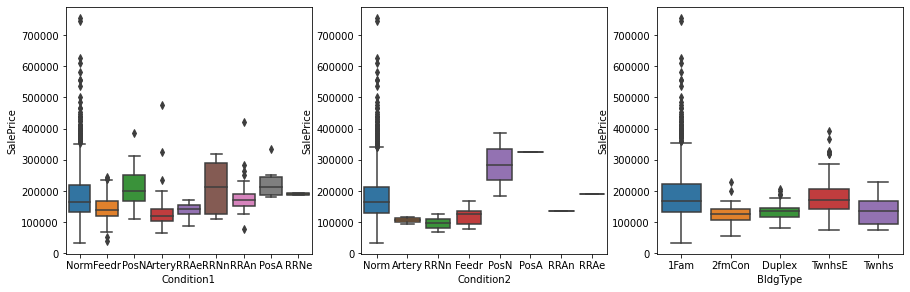

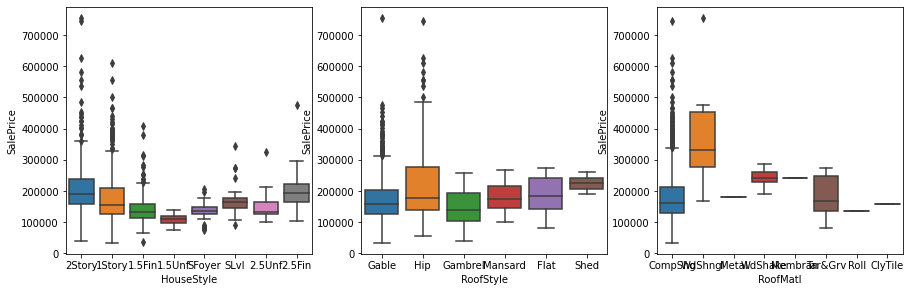

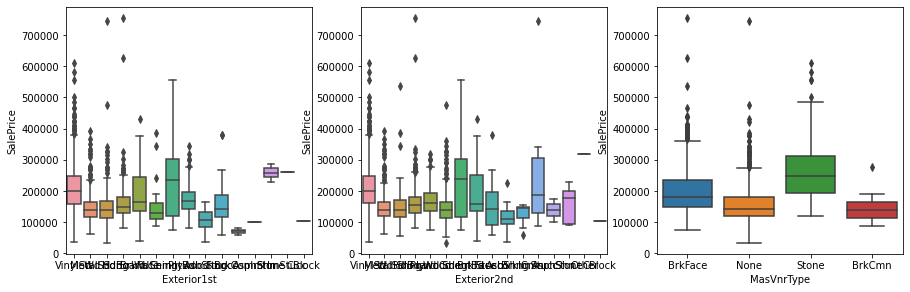

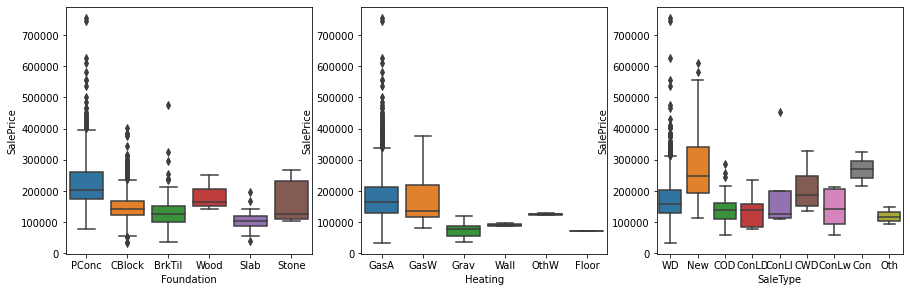

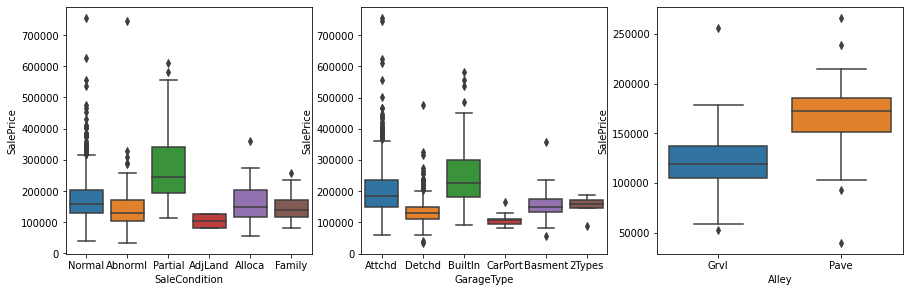

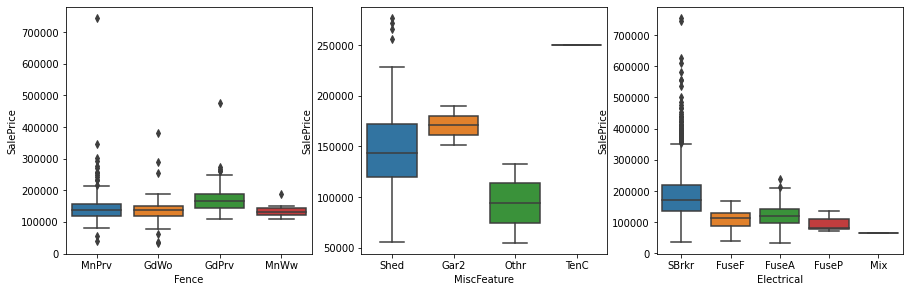

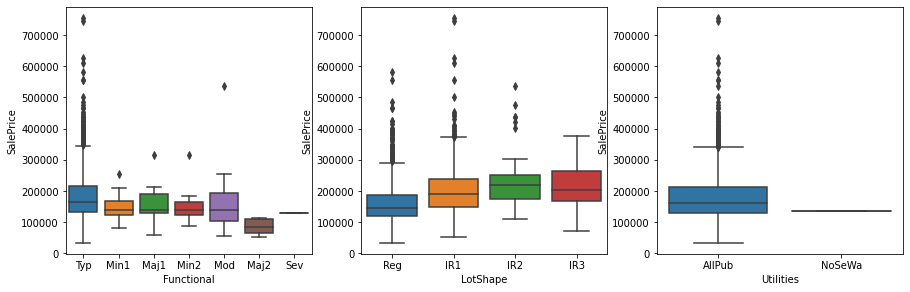

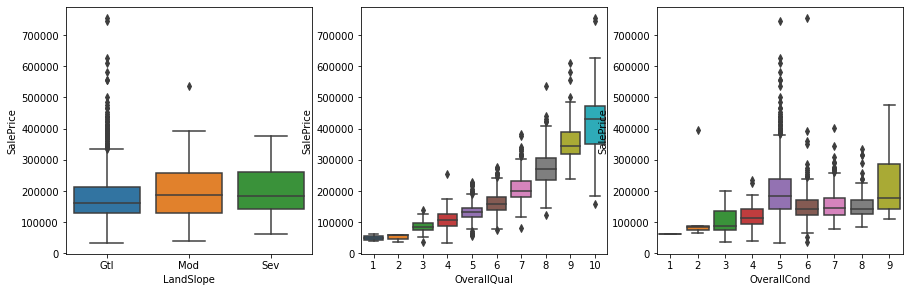

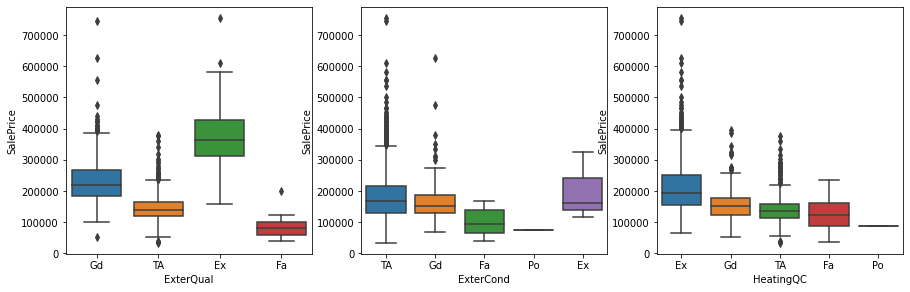

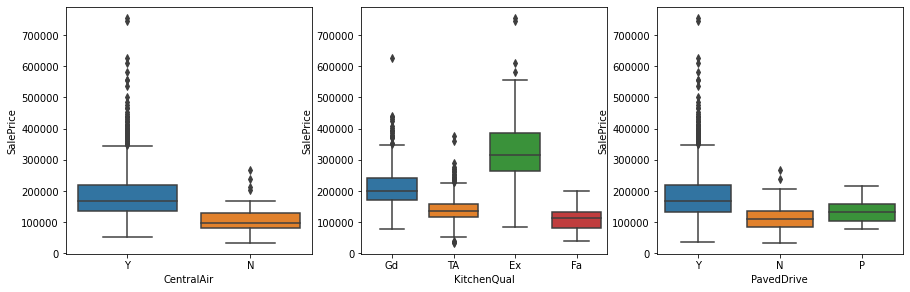

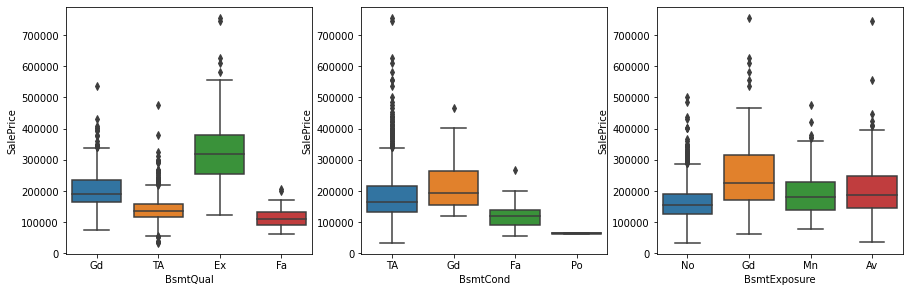

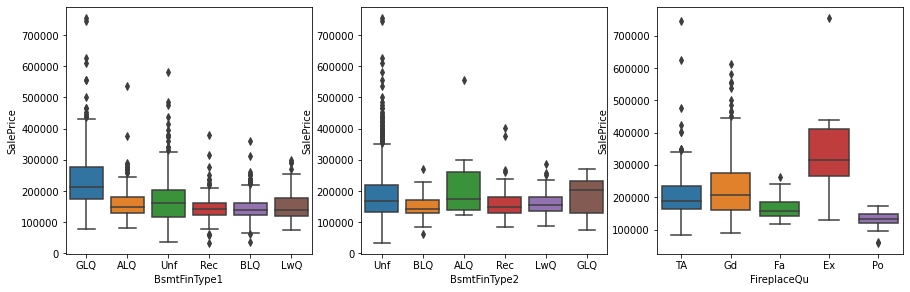

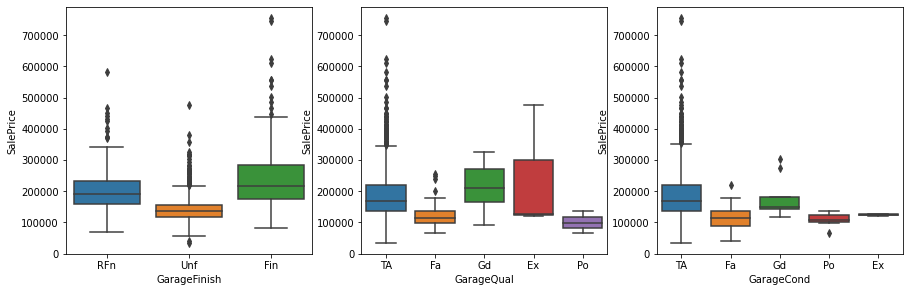

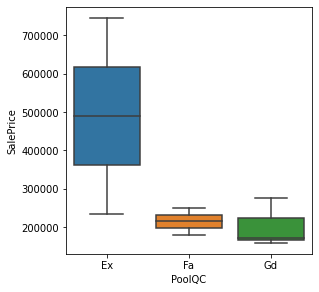

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df_train[categorical_feautres]):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=df_train, x=c, y='SalePrice', ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

### 결측값 확인
결측치 큰 순으로 내림차순 정렬해서 표현하겠습니다.



In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
total 

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
SalePrice_Log       0
Length: 82, dtype: int64

In [ ]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageQual,81,0.055479


None 값으로 대치가 아닌 no Fence, no Pool 이런식으로 대치해보기

결측치가 많은 피처들은 어떻게 해야할까?   
여러 가지 많은 방법들이 있지만, 이 데이터셋에서 NaN의 의미를 파악해보면 마냥 결측 값이라는 의미가 아닌 피처들이 있다는 것을 발견할 수 있다.  
무슨 말이냐고 하면 예를 들면, 아래 사진에서 볼 수 있는데 PoolQC는 풀장의 퀄리트에 대한 피처인데 여기서 NaN은 결측값이 아닌 풀장이 없다는 의미이다. 즉, 의미가 없는 결측값이 아닌 "없다"라는 의미인 NaN이다. (Fence도 마찬가지)  
해결방법 : 결측값을 의미하는 NaN이 아닌 없다라는 의미를 가진 None으로 대체하자!


관련 자료 : 결측 값 대체 - https://gooopy.tistory.com/44

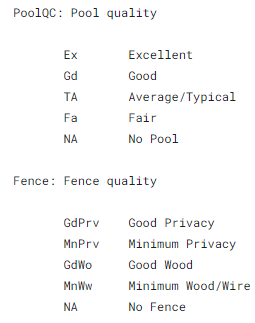

##### 아래 2가지를 잘 구분해서 처리해주자
##### Null : 값이 존재하지 않아서 결측치
##### Na : 표기의 실수나 어떠한 일로 인하여 값이 존재하지만 결측치로 표기.


### Train/Test 분포

train/test 분포가 매우 유사한것을 확인할 수 있습니다.  
그래서 이 부분에서는 Train에 오버피팅(Overfitting)되는 위험은 없을 것이라 생각했습니다.

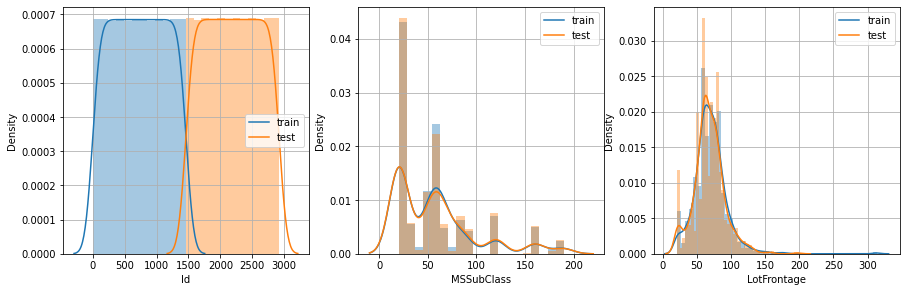

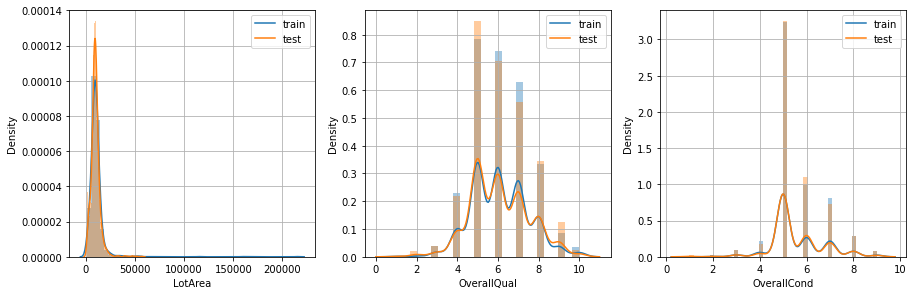

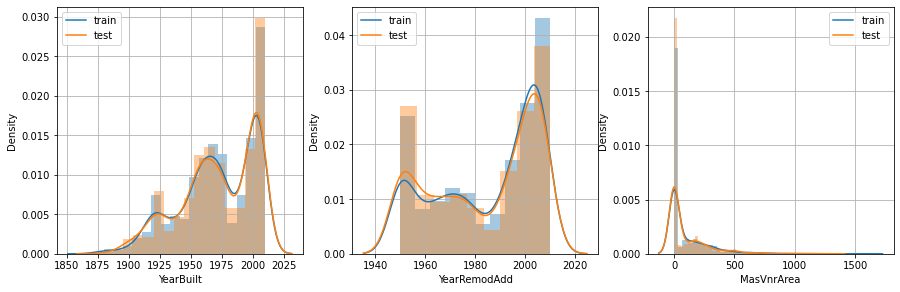

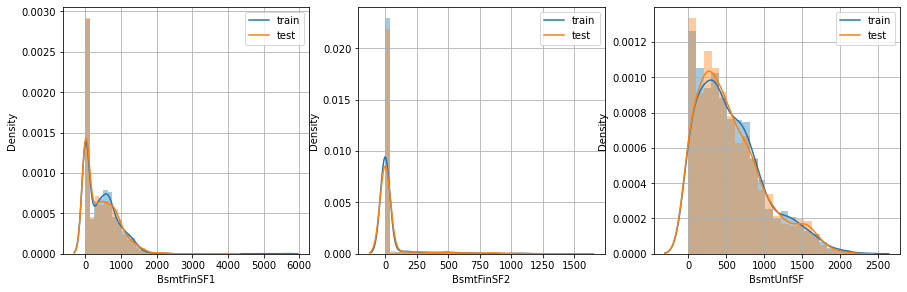

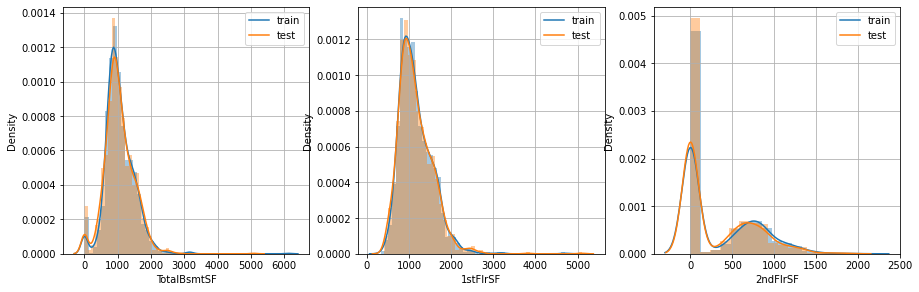

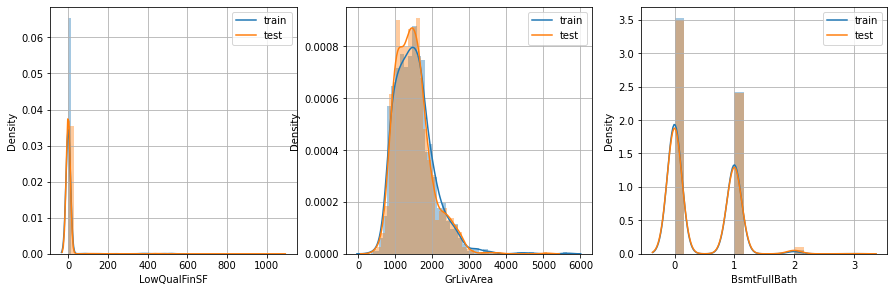

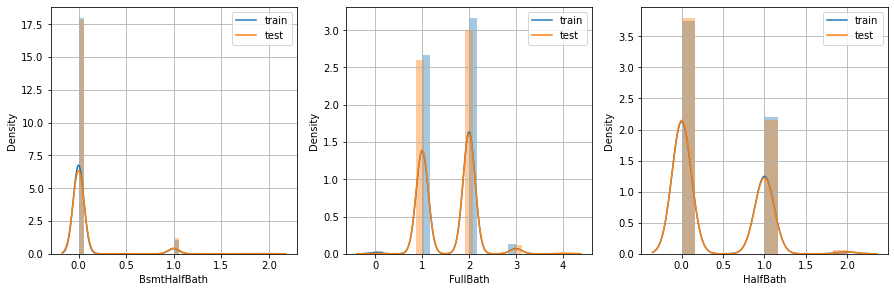

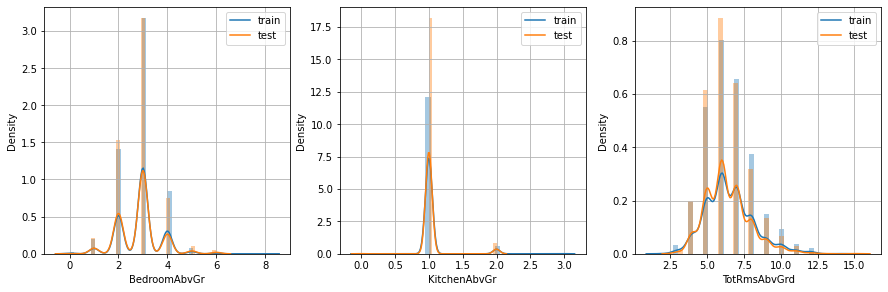

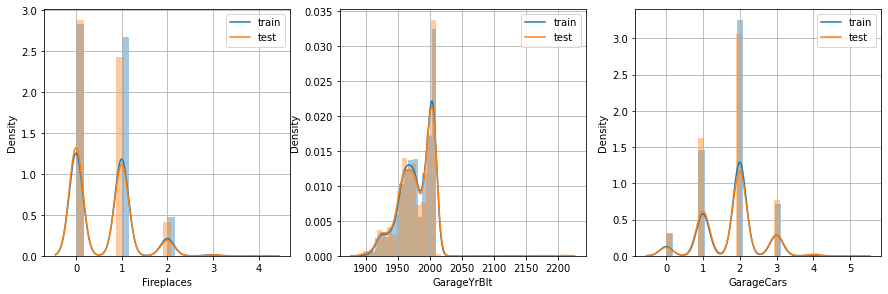

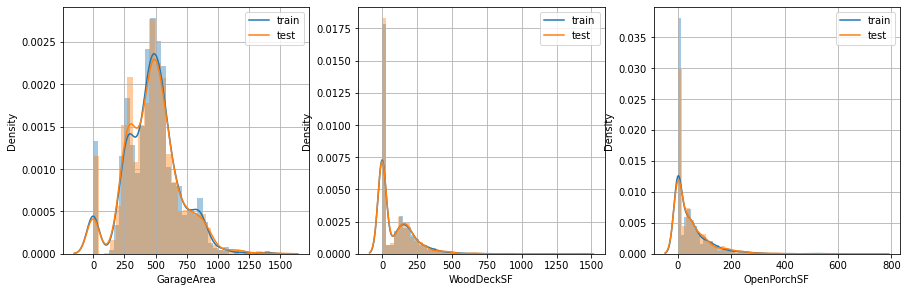

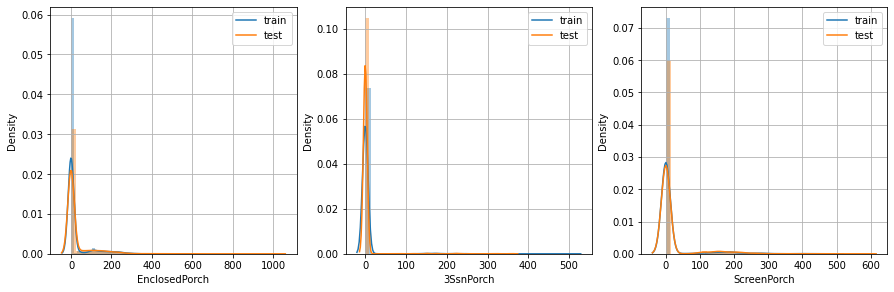

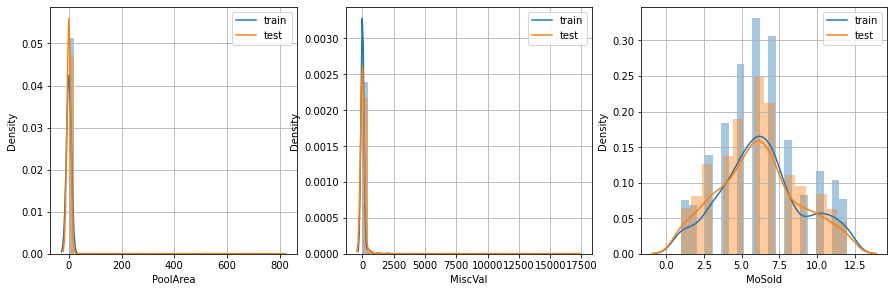

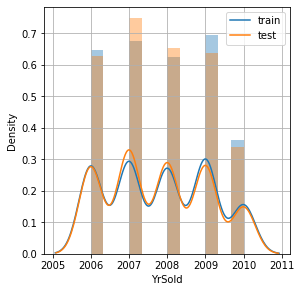

In [ ]:
Numeric = df_train.copy()
del Numeric['SalePrice']
del Numeric['SalePrice_Log']
Numeric_columns = Numeric.select_dtypes(include = ["int64","float64"]).columns

ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(Numeric_columns):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(df_train[c].dropna())
            sns.distplot(df_test[c].dropna())
            plt.legend(['train', 'test'])
            plt.grid()            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1
del Numeric

## 해야 할 Feature engineering
1. saleprice에 log를 취해 정규분포형태로 만들어서 처리하기
2. 이상치 제거
3. 결측값 제거
4. 파생변수 생성(변수의 사칙연산, 통계값, 범주화, 스케일링)
5. 범주형 변수 Encoding(기본은 one-hot, 응용해서 다른 방법도 찾아볼 것)
6. 불필요하다고 판단되는 변수들 drop 시키고, 데이터 전처리 파이프라인 만들기

## 모델링 시작

